In [34]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
full_data_path = "../data/02_intermediate/merged_data.csv"

In [6]:
full_data_df = pd.read_csv(full_data_path)
full_data_df

,origin,destination,departure_date,query_date,days_before_departure,airline,price,currency,stops,flight_duration,cabin,offer_rank,departure_time,arrival_time,source
0,CDG,AMS,2026-01-15,2026-01-03,12,Air France,117.0,EUR,1,495,ECONOMY,1,"9:20 AM on Thu, Jan 15","5:35 PM on Thu, Jan 15",google_flights
1,CDG,AMS,2026-01-15,2026-01-03,12,Norwegian,119.0,EUR,1,380,ECONOMY,2,"12:35 PM on Thu, Jan 15","6:55 PM on Thu, Jan 15",google_flights
2,CDG,AMS,2026-01-15,2026-01-03,12,Air France,125.0,EUR,1,375,ECONOMY,3,"9:20 AM on Thu, Jan 15","3:35 PM on Thu, Jan 15",google_flights
3,CDG,AMS,2026-01-15,2026-01-03,12,Air France,117.0,EUR,1,635,ECONOMY,4,"7:00 AM on Thu, Jan 15","5:35 PM on Thu, Jan 15",google_flights
4,CDG,AMS,2026-01-16,2026-01-03,13,Norwegian,127.0,EUR,1,305,ECONOMY,1,"12:30 PM on Fri, Jan 16","5:35 PM on Fri, Jan 16",google_flights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64755,FCO,CDG,2026-05-31,2026-01-15,136,ITA,99.0,EUR,0,130,ECONOMY,1,"9:30 PM on Sun, May 31","11:40 PM on Sun, May 31",google_flights
64756,FCO,CDG,2026-05-31,2026-01-15,136,ITA,129.0,EUR,0,130,ECONOMY,2,"3:10 PM on Sun, May 31","5:20 PM on Sun, May 31",google_flights
64757,FCO,CDG,2026-05-31,2026-01-15,136,ITA,145.0,EUR,0,130,ECONOMY,3,"8:35 AM on Sun, May 31","10:45 AM on Sun, May 31",google_flights
64758,FCO,CDG,2026-05-31,2026-01-15,136,ITA,145.0,EUR,0,135,ECONOMY,4,"11:00 AM on Sun, May 31","1:15 PM on Sun, May 31",google_flights


In [8]:
full_data_df['query_date'] = pd.to_datetime(full_data_df['query_date'])
full_data_df['departure_date'] = pd.to_datetime(full_data_df['departure_date'])

In [21]:
unique_flights_def_columns = ["origin","destination", "departure_date","departure_time", "airline","flight_duration"]
grouped_data = full_data_df.groupby(unique_flights_def_columns)
len(grouped_data)

12208

In [30]:
fluctuating_prices = []
for group_key, group in grouped_data:
    origin, dest, dep_date, dep_time, airline,flight_duration = group_key
    group_sorted = group.sort_values('days_before_departure')
    is_changing = group_sorted["price"].nunique() > 1
    if len(group_sorted)>4 and is_changing: 
        fluctuating_prices.append(group_sorted)

In [32]:
len(fluctuating_prices)

4290

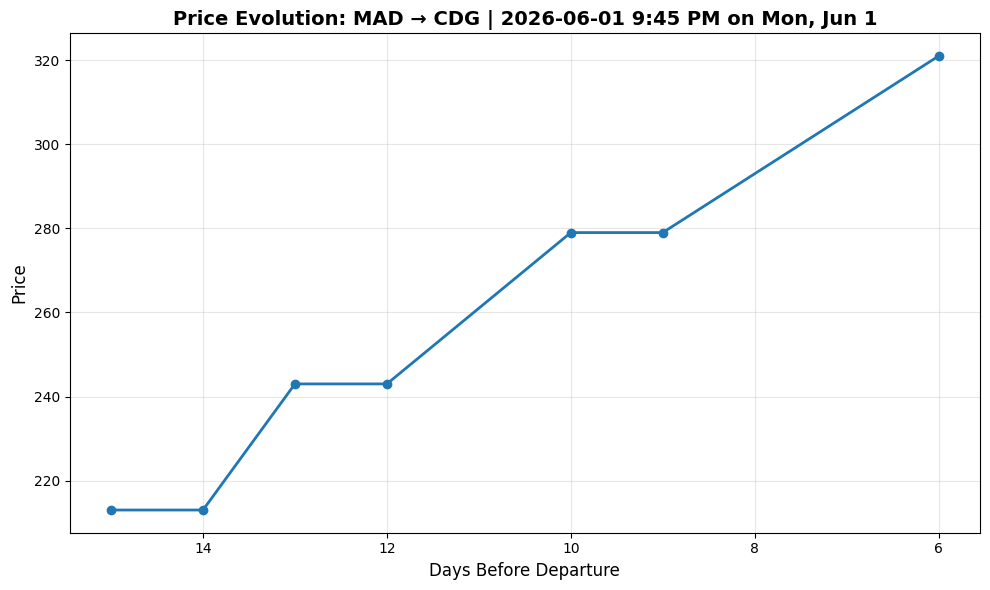

In [36]:
selected_idx = 5 
# Create a unique flight identifier for the dictionary key
flight_id = f"{origin}_{dest}_{dep_date.strftime('%Y-%m-%d')}_{dep_time.replace(':', '-').replace(' ', '_')}"

# Create figure for this flight
fig, ax = plt.subplots(figsize=(10, 6))

# Plot price vs days_before_departure
ax.plot(
    fluctuating_prices[selected_idx]['days_before_departure'], 
    fluctuating_prices[selected_idx]['price'],
    marker='o',
    linewidth=2,
    markersize=6
)

# Formatting
ax.set_xlabel('Days Before Departure', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title(f'Price Evolution: {origin} → {dest} | {dep_date.strftime("%Y-%m-%d")} {dep_time}', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
# Reverse x-axis to show evolution from oldest to newest (approaching departure)
ax.invert_xaxis()

plt.tight_layout()
plt.show()